# Boston Homes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import seaborn as sns
from math import sqrt
from sklearn.metrics import r2_score

In [3]:
lb=load_boston()

In [39]:
lb.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [40]:
print(lb.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [6]:
df=pd.DataFrame(lb.data,columns=lb.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df['PRICE'] = lb.target 

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

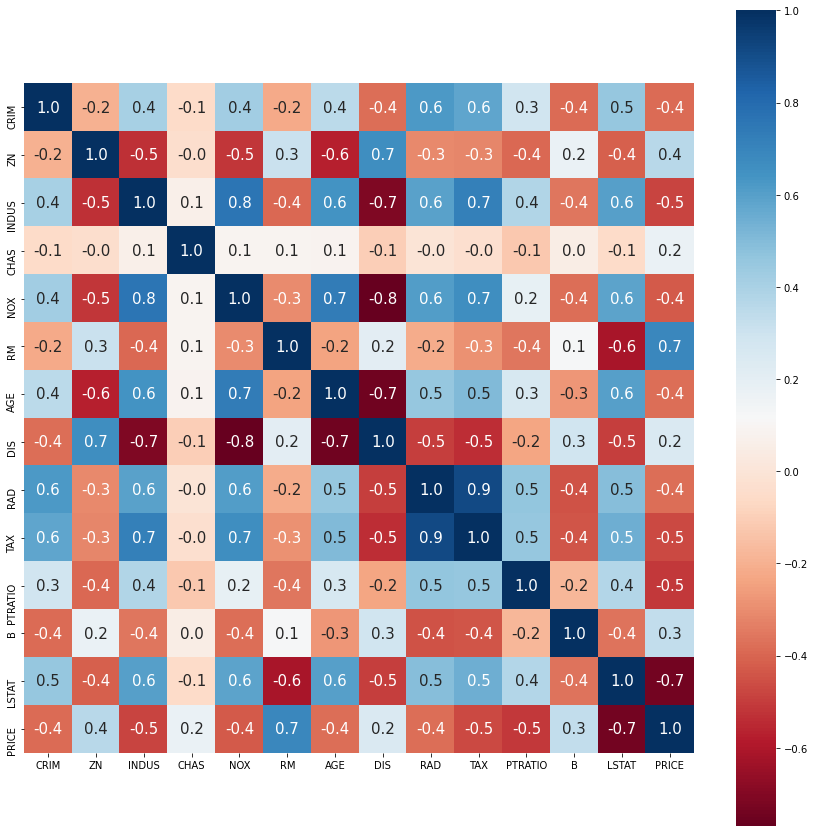

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='RdBu',annot=True,      fmt='.1f',annot_kws={'size':15},square= True)

In [11]:
X=lb.data
y=lb.target

X.shape   ,       y.shape

((506, 13), (506,))

***

In [12]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=4)

In [13]:
Xtrain.shape        , Xtest.shape     ,                ytrain.shape      , ytest.shape

((354, 13), (152, 13), (354,), (152,))

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [15]:
lm.fit(Xtrain,ytrain)

LinearRegression()

In [16]:
predicted=lm.predict(Xtest)

In [17]:
cof= pd.Series(index=lb.feature_names,data=lm.coef_).sort_values()

In [18]:
cof

NOX       -14.435783
DIS        -1.552144
PTRATIO    -0.803275
LSTAT      -0.523478
CRIM       -0.122570
TAX        -0.014067
INDUS      -0.008834
AGE        -0.003448
B           0.009354
ZN          0.055678
RAD         0.326250
RM          3.280080
CHAS        4.693448
dtype: float64

<AxesSubplot:>

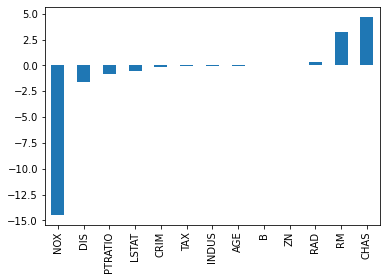

In [19]:
cof.plot(kind='bar')
# sns.barplot(x=s, y=s.index)

In [20]:
plt.scatter(df['RM'],lb.target)

In [21]:
plt.scatter(df['NOX'],lb.target)

In [22]:
lm.score(Xtest,ytest)   #R2 value

0.7121818377409191

In [23]:
r2_score(ytest,predicted)

0.7121818377409191

In [24]:
sqrt(mean_squared_error(ytest,predicted))

5.482152251362979

In [25]:
r2_score(ytest,predicted)

0.7121818377409191

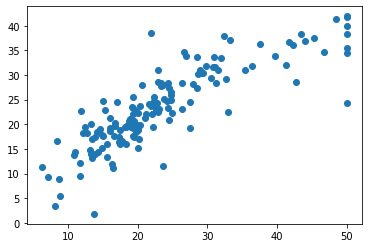

In [26]:
plt.scatter (ytest, predicted)

In [27]:
pd.DataFrame({'Actual':ytest, 'Predicted':predicted, 'Error':ytest-predicted})

,Actual,Predicted,Error
0,16.5,11.073809,5.426191
1,24.8,26.479103,-1.679103
2,17.4,17.344899,0.055101
3,19.3,19.194861,0.105139
4,37.6,36.361707,1.238293
...,...,...,...
147,14.9,17.891931,-2.991931
148,21.9,38.439440,-16.539440
149,18.5,19.707526,-1.207526
150,30.8,31.671812,-0.871812


C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


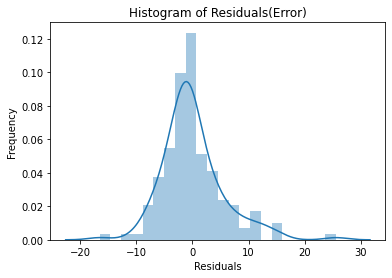

In [28]:
# Checking Normality of errors
sns.distplot(ytest-predicted)
plt.title("Histogram of Residuals(Error)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

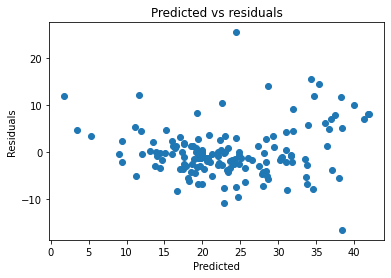

In [29]:
plt.scatter(predicted,ytest-predicted)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

***

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(Xtrain, ytrain)

RandomForestRegressor()

In [33]:
reg.score(Xtest,ytest)   #R2 value

0.8206063982480403

In [34]:
r2_score(ytest,reg.predict(Xtest))

0.8206063982480403

In [35]:
sqrt(mean_squared_error(ytest,reg.predict(Xtest)))

4.328081891767081

***